In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering  
from sklearn import datasets

# Ejemplo con K-means

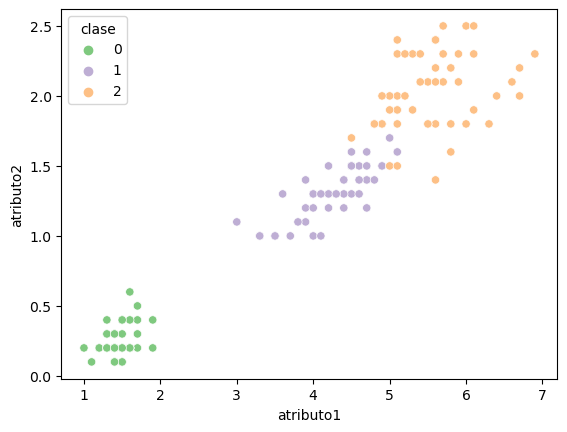

In [3]:
iris = datasets.load_iris()
X = iris.data[:,2:]
y = iris.target
df1 = pd.DataFrame()
df1["atributo1"]= X[:,0]
df1["atributo2"] = X[:,1]
df1["clase"]=y
sns.scatterplot(x=df1["atributo1"],y=df1["atributo2"],hue = df1["clase"], palette="Accent")
plt.show()

In [3]:
#Escalamos nuestros datos 
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X.shape

(150, 2)

In [4]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
kmeans.inertia_

1.701874688192097

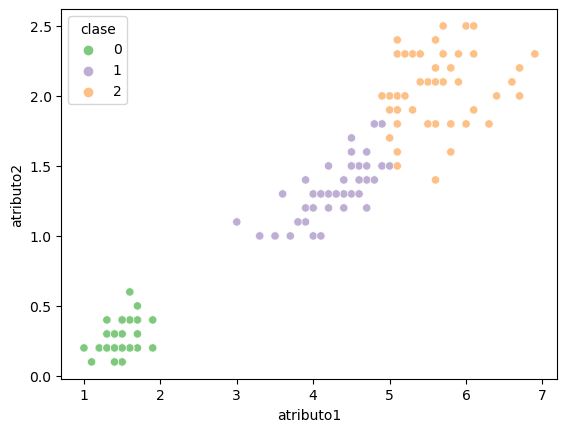

In [10]:
df1["atributo1"]= X[:,0]
df1["atributo2"] = X[:,1]
df1["clase"]=kmeans.labels_
sns.scatterplot(x=df1["atributo1"],y=df1["atributo2"],hue = df1["clase"], palette="Accent")
plt.show()

In [11]:
#Aqui calculo las inercias para k=1 hasta k = 10
inercias = [] 
  
for k in range(1,11): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)     
    inercias.append(kmeans.inertia_) 
inercias

[550.8953333333333,
 86.39021984551397,
 31.412885668276978,
 20.32672016024508,
 13.91690875790876,
 16.184320536763472,
 11.06632955791012,
 7.940892259914,
 6.998019268313384,
 6.361260618608444]

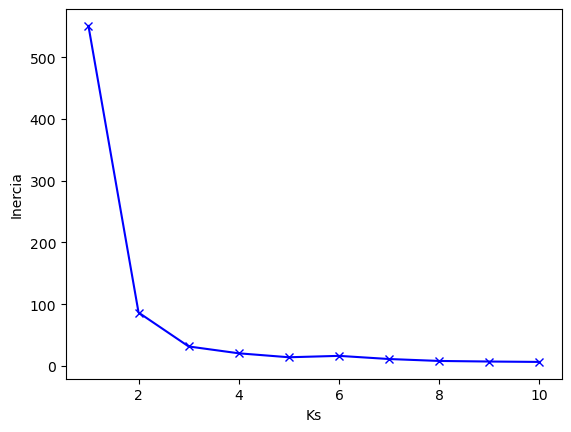

In [12]:
plt.plot(range(1,11), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [13]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

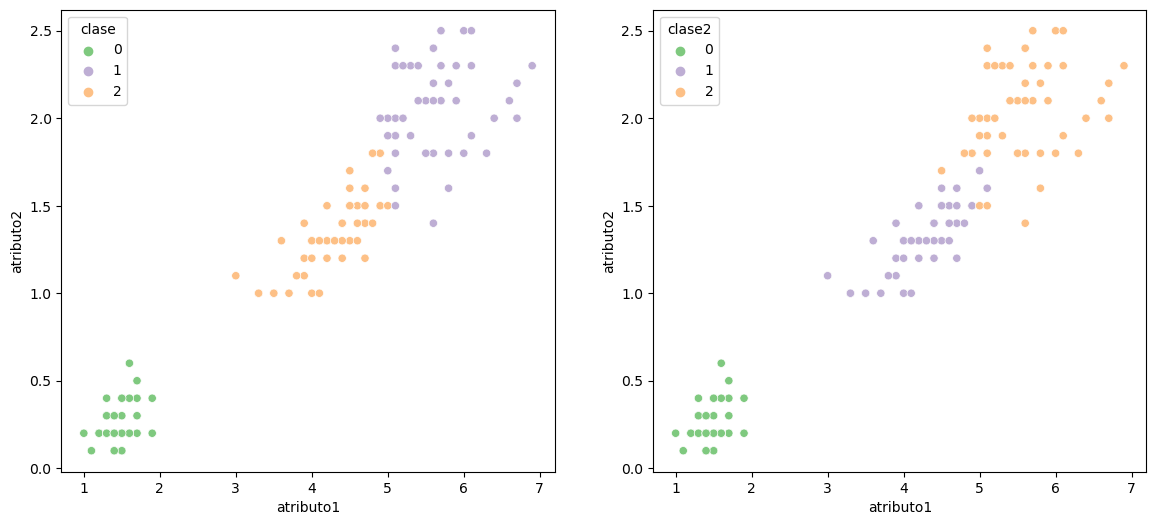

In [15]:
df1["atributo1"]= X[:,0]
df1["atributo2"] = X[:,1]
df1["clase"]=kmeans.labels_
df1["clase2"]=y

f, axes = plt.subplots(1,2, figsize=(14, 6), sharex=True)

sns.scatterplot(x=df1["atributo1"],y=df1["atributo2"],hue = df1["clase"], palette="Accent", ax=axes[0])
sns.scatterplot(x=df1["atributo1"],y=df1["atributo2"],hue = df1["clase2"], palette="Accent", ax=axes[1])
plt.show()

# Segmentación de mercado

In [36]:
df = pd.read_csv("Dataset.csv")
df

,Id,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
0,C10001,40.900749,95.40,0.00,95.40,0.166667,0.083333,1000.0,201.802084,139.509787,12
1,C10002,3202.467416,0.00,0.00,0.00,0.000000,0.000000,7000.0,4103.032597,1072.340217,12
2,C10003,2495.148862,773.17,773.17,0.00,1.000000,0.000000,7500.0,622.066742,627.284787,12
3,C10005,817.714335,16.00,16.00,0.00,0.083333,0.000000,1200.0,678.334763,244.791237,12
4,C10006,1809.828751,1333.28,0.00,1333.28,0.666667,0.583333,1800.0,1400.057770,2407.246035,12
...,...,...,...,...,...,...,...,...,...,...,...
8631,C19184,5.871712,20.90,20.90,0.00,0.166667,0.000000,500.0,58.644883,43.473717,6
8632,C19186,28.493517,291.12,0.00,291.12,1.000000,0.833333,1000.0,325.594462,48.886365,6
8633,C19188,23.398673,144.40,0.00,144.40,0.833333,0.666667,1000.0,81.270775,82.418369,6
8634,C19189,13.457564,0.00,0.00,0.00,0.000000,0.000000,500.0,52.549959,55.755628,6


## Descripción de cada columna

- **Id**: Identificación del cliente
- **Balance**: Cantidad de saldo disponible en la cuenta del cliente
- **CantidadComprasRealizas**: Cantidad de compras realizadas por el cliente
- **CompraMasAltaRealizada**: Compra más alta realizada por el cliente 
- **CompraMasAltaRealizadaPlazos** Compra más alta realizada a plazos por el cliente
- **FrecuenciadeCompra**: Frecuencia de compra del cliente (0 si es baja, 1 si es alta)
- **FrecuenciadeCompraPlazos**: Frecuencia de compra a plazos del cliente (0 si es baja, 1 si es alta)
- **LimiteCredito**: Limite de credito del cliente
- **Pagos**: Pagos realizados por el cliente
- **PagoMinimo**: Pagos minimos realizados por el cliente
- **Anualidad**: Anualidad de la tarjeta de credito 

In [37]:
df.describe()

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,1025.433874,604.901438,420.843533,0.496000,0.368820,4522.091030,1784.478099,864.304943,11.534391
std,2095.571300,2167.107984,1684.307803,917.245182,0.401273,0.398093,3659.240379,2909.810090,2372.566350,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,6.000000
25%,148.095189,43.367500,0.000000,0.000000,0.083333,0.000000,1600.000000,418.559237,169.163545,12.000000
50%,916.855459,375.405000,44.995000,94.785000,0.500000,0.166667,3000.000000,896.675701,312.452292,12.000000
75%,2105.195853,1145.980000,599.100000,484.147500,0.916667,0.750000,6500.000000,1951.142090,825.496463,12.000000
max,19043.138560,49039.570000,40761.250000,22500.000000,1.000000,1.000000,30000.000000,50721.483360,76406.207520,12.000000


In [38]:
del df["Id"]
df.head()

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
0,40.900749,95.40,0.00,95.40,0.166667,0.083333,1000.0,201.802084,139.509787,12
1,3202.467416,0.00,0.00,0.00,0.000000,0.000000,7000.0,4103.032597,1072.340217,12
2,2495.148862,773.17,773.17,0.00,1.000000,0.000000,7500.0,622.066742,627.284787,12
3,817.714335,16.00,16.00,0.00,0.083333,0.000000,1200.0,678.334763,244.791237,12
4,1809.828751,1333.28,0.00,1333.28,0.666667,0.583333,1800.0,1400.057770,2407.246035,12


In [39]:
#Escalar los datos 
scaler = MinMaxScaler()
df_escalado = scaler.fit_transform(df)
df_escalado

array([[2.14779454e-03, 1.94536779e-03, 0.00000000e+00, ...,
        3.97765906e-03, 1.82564563e-03, 1.00000000e+00],
       [1.68169097e-01, 0.00000000e+00, 0.00000000e+00, ...,
        8.08924901e-02, 1.40344791e-02, 1.00000000e+00],
       [1.31026136e-01, 1.57662475e-02, 1.89682603e-02, ...,
        1.22633999e-02, 8.20961806e-03, 1.00000000e+00],
       ...,
       [1.22871936e-03, 2.94456089e-03, 0.00000000e+00, ...,
        1.60132031e-03, 1.07843629e-03, 0.00000000e+00],
       [7.06688341e-04, 0.00000000e+00, 0.00000000e+00, ...,
        1.03507417e-03, 7.29475795e-04, 0.00000000e+00],
       [1.95717777e-02, 2.22932216e-02, 2.68208163e-02, ...,
        1.24436330e-03, 1.15527021e-03, 0.00000000e+00]])

In [43]:
#Aplicamos el kmeans y buscamos K
inercias = [] 
  
for k in range(1,20): 
    kmeans = KMeans(k)
    kmeans.fit(df_escalado)     
    inercias.append(kmeans.inertia_) 
inercias

[3487.274403887947,
 1362.0066088257124,
 1013.8471827233752,
 803.2968770996713,
 669.9742801532248,
 582.5259195475326,
 521.6515622102237,
 474.47904947740153,
 430.7875190603869,
 396.0446384444506,
 378.8975629125253,
 364.077496606674,
 349.56229345833543,
 337.638897034121,
 323.43468156274463,
 310.3267290541296,
 297.8161559926812,
 287.2023279049542,
 279.04577784474003]

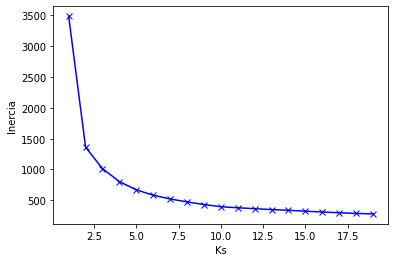

In [44]:
plt.plot(range(1,20), inercias, 'bx-') 
plt.xlabel('Ks') 
plt.ylabel('Inercia') 
plt.show()

In [55]:
#Aplicación del algoritmo kmeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_escalado)
kmeans.labels_

array([2, 2, 3, ..., 0, 0, 0], dtype=int32)

In [56]:
df.shape

(8636, 10)

In [57]:
#Encontramos los centroides de los 4 clusters 
kmeans.cluster_centers_

array([[7.09390470e-02, 7.50672552e-03, 7.53480499e-03, 2.71104540e-03,
        2.29237949e-01, 8.92123799e-02, 1.06944383e-01, 1.86181276e-02,
        5.78757949e-03, 2.28952772e-01],
       [7.83260438e-02, 4.07882057e-02, 2.33825501e-02, 4.65592500e-02,
        9.54870141e-01, 8.93447010e-01, 1.60365397e-01, 4.32845794e-02,
        1.26199619e-02, 9.34298985e-01],
       [9.82570005e-02, 4.65518550e-03, 5.10427477e-03, 9.03534987e-04,
        8.82031702e-02, 1.96796617e-02, 1.39356858e-01, 3.21709750e-02,
        1.20891864e-02, 9.78178090e-01],
       [7.09951824e-02, 2.48026116e-02, 2.15635123e-02, 1.50184650e-02,
        6.30856884e-01, 3.17763802e-01, 1.61530112e-01, 3.33102391e-02,
        9.55298109e-03, 9.79581673e-01]])

In [58]:
df_centroides  = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
df_centroides

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
0,0.070939,0.007507,0.007535,0.002711,0.229238,0.089212,0.106944,0.018618,0.005788,0.228953
1,0.078326,0.040788,0.023383,0.046559,0.954870,0.893447,0.160365,0.043285,0.012620,0.934299
2,0.098257,0.004655,0.005104,0.000904,0.088203,0.019680,0.139357,0.032171,0.012089,0.978178
3,0.070995,0.024803,0.021564,0.015018,0.630857,0.317764,0.161530,0.033310,0.009553,0.979582


In [59]:
#Tranformo el df_centroides de la forma escalada a la forma en la que se mueven los valores de cada columna 
df_centroides = scaler.inverse_transform(df_centroides)
df_centroides =  pd.DataFrame(data = df_centroides, columns = [df.columns])
df_centroides

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad
0,1350.902100,368.126591,307.128070,60.998522,0.229238,0.089212,3252.984257,944.387638,442.226052,7.373717
1,1491.573705,2000.236069,953.101969,1047.583124,0.954870,0.893447,4852.943628,2195.505445,964.262351,11.605794
2,1871.121675,228.288295,208.056620,20.329537,0.088203,0.019680,4223.737906,1631.807495,923.707817,11.869069
3,1351.971096,1216.309407,878.955717,337.915463,0.630857,0.317764,4887.826849,1689.592604,729.926036,11.877490


### ¿Qué observamos en la tabla anterior? 
- Cluster 2, los clientes suelen tener una frecuencia de compra muy baja, no realizan compras con un alto valor y a la vez mantienen un balance alto.
- Cluster 1, los clientes tienen un balance promedio, suelen hacer compras con alto valor, son clientes recurrentes debido a que tienen la frecuencia más alta de compra tanto de un solo pago como a plazos. 
- Cluster 3, los clientes con mayor limite de credito y un comportamiento similar al cluster 1.
- En el cluster 0 los clientes se diferencian por un limite de credito bajo y anualidad baja.


In [62]:
df["clase"] = kmeans.labels_
df

,Balance,CantidadComprasRealizadas,CompraMasAltaRealizada,CompraMasAltaRealizadaPlazos,FrecuenciadeCompra,FrecuenciadeCompraPlazos,LimiteCredito,Pagos,PagoMinimo,Anualidad,clase
0,40.900749,95.40,0.00,95.40,0.166667,0.083333,1000.0,201.802084,139.509787,12,2
1,3202.467416,0.00,0.00,0.00,0.000000,0.000000,7000.0,4103.032597,1072.340217,12,2
2,2495.148862,773.17,773.17,0.00,1.000000,0.000000,7500.0,622.066742,627.284787,12,3
3,817.714335,16.00,16.00,0.00,0.083333,0.000000,1200.0,678.334763,244.791237,12,2
4,1809.828751,1333.28,0.00,1333.28,0.666667,0.583333,1800.0,1400.057770,2407.246035,12,3
...,...,...,...,...,...,...,...,...,...,...,...
8631,5.871712,20.90,20.90,0.00,0.166667,0.000000,500.0,58.644883,43.473717,6,0
8632,28.493517,291.12,0.00,291.12,1.000000,0.833333,1000.0,325.594462,48.886365,6,1
8633,23.398673,144.40,0.00,144.40,0.833333,0.666667,1000.0,81.270775,82.418369,6,0
8634,13.457564,0.00,0.00,0.00,0.000000,0.000000,500.0,52.549959,55.755628,6,0
